# `add_height_from_pressure_axis`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.add_height_from_pressure_axis.html#geocat-viz.util.add_height_from_pressure_axis">add_height_from_pressure_axis</a>.


In [1]:
# Import Packages:

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import cmaps
import metpy.calc as mpcalc
from metpy.units import units

import scipy

import geocat.datafiles as gdf
import geocat.viz as gv

In [2]:
# Open a netCDF data file using xarray default engine and load the data into xarrays
ds = xr.open_dataset(gdf.get("netcdf_files/mxclim.nc"))

# Extract variables
U = ds.U[0, :, :]

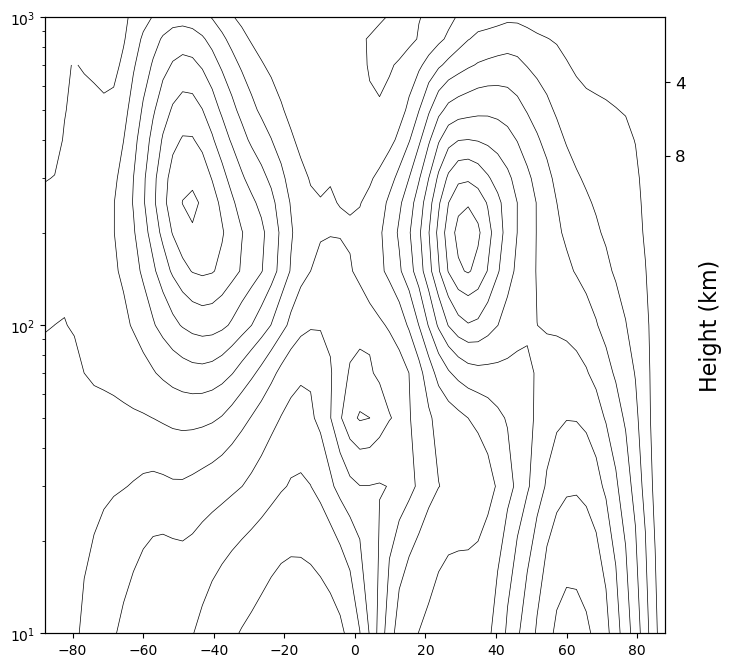

In [3]:
# Generate figure (set its size (width, height) in inches) and axes
plt.figure(figsize=(8, 8))
ax = plt.axes()

# Set y-axis to have log-scale
plt.yscale('log')

# Specify which contours should be drawn
levels = np.linspace(-55, 55, 23)

# Plot contour lines
lines = U.plot.contour(ax=ax,
                       levels=levels,
                       colors='black',
                       linewidths=0.5,
                       linestyles='solid',
                       add_labels=False)

# Invert y-axis
ax.invert_yaxis()

# Create second y-axis to show geo-potential height.
axRHS = gv.add_height_from_pressure_axis(ax, heights=[4, 8])

plt.show();